In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Implement the simulation of a Poisson process $(N_t)_{0 \leq t \leq 100}$ with parameter $\lambda = 0.1$ on the time interval $[0,100]$.

In [3]:
def simulate_pp(lambda_rate, T):
    Si = 0 # let S0 = 0
    count = 0 # the number of events
    Nt = [0] # let N0 = 0
    arrival_time = [0] # create a list contains all arrival times
    while Si <= T: 
        Xi = np.random.exponential(1/lambda_rate) # interarrival time, follows exponential distribution
        Si += Xi # arrival time of the ith event
        if Si <= T:
            arrival_time.append(Si) # when Si is inside the time interval, add it into the arrival time list
            count += 1 
            Nt.append(count) # final count of the number of events
    return arrival_time, Nt # return a tuple, the second one is the number of events

arrival = simulate_pp(0.1, 100)
arrival

([0,
  4.290970111085344,
  9.839961697417888,
  42.416587569482274,
  49.31352114930938,
  60.832358260299195,
  61.30514581104406,
  79.23299147807654,
  99.22431572031843],
 [0, 1, 2, 3, 4, 5, 6, 7, 8])

2. Plot a trajectory of your simulated process from part 1 using one of the three methods we saw in class.

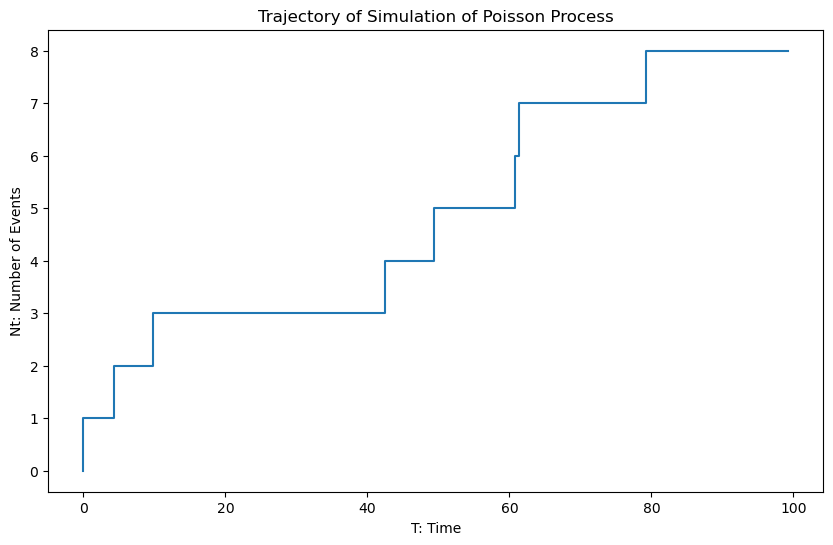

In [11]:
plt.figure(figsize=(10, 6))
plt.step(arrival[0], arrival[1]) # let X-axis be the time, and let Y-axis be the number of events
plt.xlabel('T: Time')
plt.ylabel('Nt: Number of Events')
plt.title('Trajectory of Simulation of Poisson Process')
plt.show()

3. Simulate a __compound Poisson process__ $(C_t)_{0 \leq t \leq 40}$ (see __Lecture 5__) with parameter $\lambda=1/2$ on the time interval $[0,40]$ where the jumps $Y_1, Y_2, \ldots$ are given as random variables

$$ Y_i = e^{Z_i} \qquad (i = 1,2,\ldots)$$

with $Z_1, Z_2, \ldots$ i.i.d. normally distributed random variables with mean 0 and variance 1 (also independent of the underlying Poisson process $(N_t)_{0 \leq t \leq 40}$). Plot a trajectory of your simulated process.

*Hint*: Use your method from Problem 1 to simulate the underlying Poisson Process $(N_t)_{0 \leq t \leq 40}$ driving the compound Poisson process $(C_t)_{0 \leq t \leq 40}$.

In [12]:
# simulate the poisson process with rate of 1/2 from [0,40]
arrival_2 = simulate_pp(1/2, 40)
arrival_2

def compound_pp(Nt): 
    i = 1 
    Ci = 0 
    cumsum = [0] # create a list that store the sum
    for i in range(1, len(Nt)):
        Zi = np.random.normal(0,1) # random variable Zi
        Yi = np.exp(Zi) # let Yi = e^(Zi)
        Ci += Yi # let Ci be the sum
        cumsum.append(Ci)
    return cumsum

Ct = compound_pp(arrival_2[1])
Ct

[0,
 2.276211605835573,
 2.748448575163057,
 21.120210367351135,
 23.28099762086575,
 24.03979488859034,
 25.26034842517886,
 26.146961461918647,
 26.982406399538057,
 28.651187963757828,
 29.059826186367125,
 30.777845142048374,
 31.571036278480573,
 33.06551864260469,
 33.711985145220446,
 34.85031282952628,
 35.84346375766218,
 36.42495395235545,
 37.39303318454467,
 37.92326298793784,
 38.384954538443786]

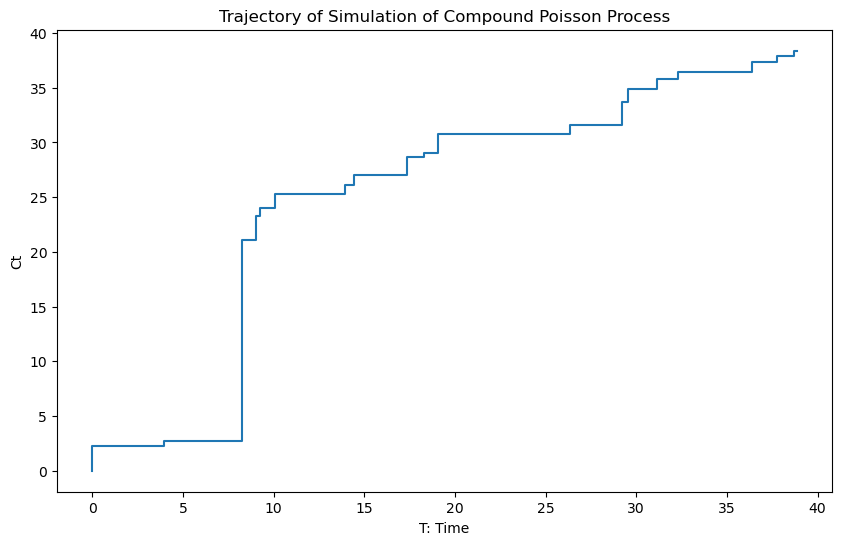

In [13]:
plt.figure(figsize=(10, 6))
plt.step(arrival_2[0],Ct) # let X-axis be time, and Y-axis be Ct, the sum
plt.xlabel('T: Time')
plt.ylabel('Ct')
plt.title('Trajectory of Simulation of Compound Poisson Process')
plt.show()

4. Simulate $M=10000$ times the compound Poisson process from part 1 and compute the empricial mean and variance of your samples for the random variable $C_{40}$. Compare your empricial values with the exact theoretical values which are given by

$$\mathbb{E}[C_{40}] = \mathbb{E}[N_{40}] \cdot \mathbb{E}[Y_1] \qquad \text{and} \qquad \text{Var}(C_{40}) = \mathbb{E}[N_{40}] \cdot \mathbb{E}[Y^2_1].$$

*Hint*: Recall that 
$$\mathbb{E}[e^{Z_1}] = e^{0.5} \qquad \text{and} \qquad  \mathbb{E}[(e^{Z_1})^2] = e^2.$$

In [14]:
EN40 = 1/2 * 40
EYi = np.exp(0.5)
EYi_sqr = np.exp(2)
EC40 = EN40 * EYi
print(EC40)

VarC40 = EN40 * EYi_sqr
print(VarC40)

32.97442541400257
147.78112197861302


In [15]:
# empirical values
M = 10000
simulation_sum = 0
simulation_sqr_sum = 0

for i in range(M):
    a = simulate_pp(1/2, 40)
    Nt = a[1]
    Ct = compound_pp(Nt)[-1]
    simulation_sum += Ct
    simulation_sqr_sum += Ct**2
    
meanC40 = simulation_sum / M 
print(meanC40)

varianceC40 = simulation_sqr_sum / M - meanC40**2
print(varianceC40)

33.11858512449614
146.80958754283915


Conclusion: The empirical results are very close to the theoretical values. The mean and variance obtained from the simulations are within a small margin of error from the expected theoretical values.